# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [208]:
#Keras
from keras import layers
from keras.models import load_model

#Pandas
import pandas as pd

#TensorFlow
from tensorflow.keras.models import Sequential

#Seaborn
import seaborn as sns

#Sci-kit learn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#Matplotlib
import matplotlib.pyplot as plt

#Numpy
import numpy as np

#Scipy
from scipy.stats import chisquare

In [52]:
# your code here
tic_tac_toe_data = pd.read_csv("tic-tac-toe.csv")

In [54]:
tic_tac_toe_data.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [56]:
tic_tac_toe_data.dtypes

TL       object
TM       object
TR       object
ML       object
MM       object
MR       object
BL       object
BM       object
BR       object
class      bool
dtype: object

In [60]:
#Check for the unique values in the dataset
for col in tic_tac_toe_data.columns:
    unique_vals = tic_tac_toe_data[col].unique()
    print(f"{col}: {unique_vals}") 

TL: ['x' 'o' 'b']
TM: ['x' 'o' 'b']
TR: ['x' 'o' 'b']
ML: ['x' 'o' 'b']
MM: ['o' 'b' 'x']
MR: ['o' 'b' 'x']
BL: ['x' 'o' 'b']
BM: ['o' 'x' 'b']
BR: ['o' 'x' 'b']
class: [ True False]


In [62]:
#Check frequencies of the data for each column to check for potential bias
for col in tic_tac_toe_data.columns:
    frequency_vals = tic_tac_toe_data[col].value_counts()
    print(f"{col}: {frequency_vals}\n")

TL: TL
x    418
o    335
b    205
Name: count, dtype: int64

TM: TM
x    378
o    330
b    250
Name: count, dtype: int64

TR: TR
x    418
o    335
b    205
Name: count, dtype: int64

ML: ML
x    378
o    330
b    250
Name: count, dtype: int64

MM: MM
x    458
o    340
b    160
Name: count, dtype: int64

MR: MR
x    378
o    330
b    250
Name: count, dtype: int64

BL: BL
x    418
o    335
b    205
Name: count, dtype: int64

BM: BM
x    378
o    330
b    250
Name: count, dtype: int64

BR: BR
x    418
o    335
b    205
Name: count, dtype: int64

class: class
True     626
False    332
Name: count, dtype: int64



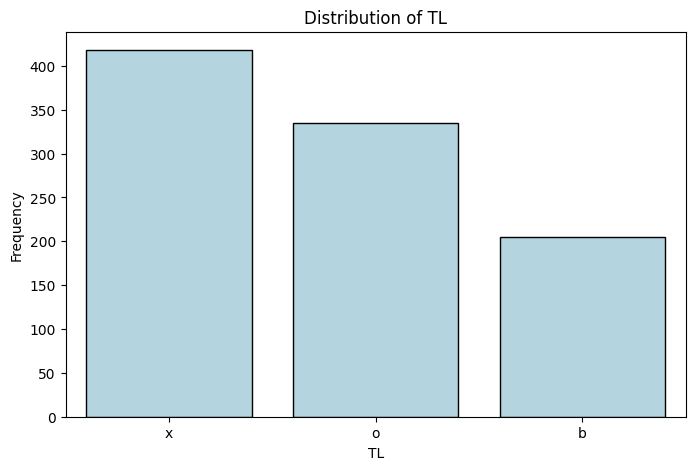

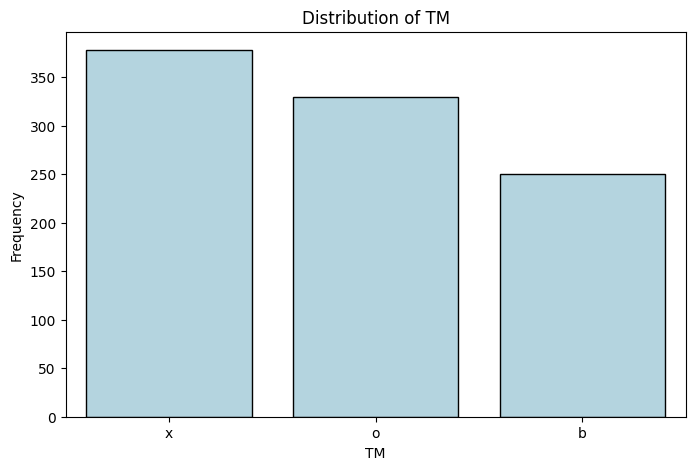

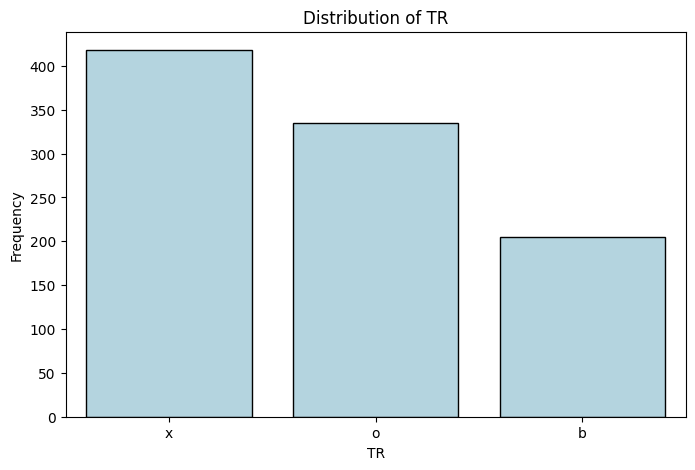

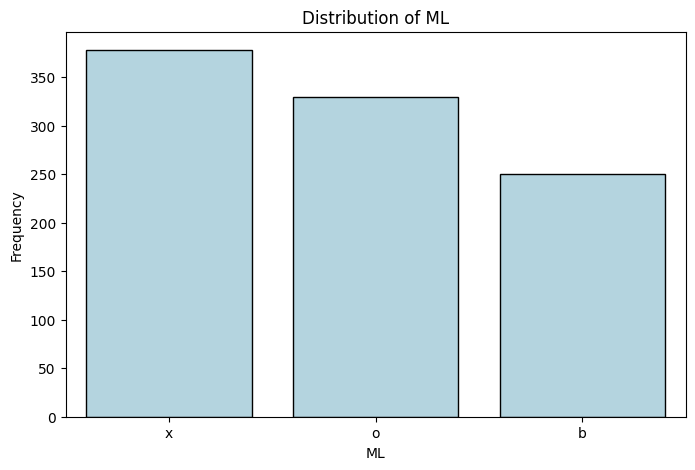

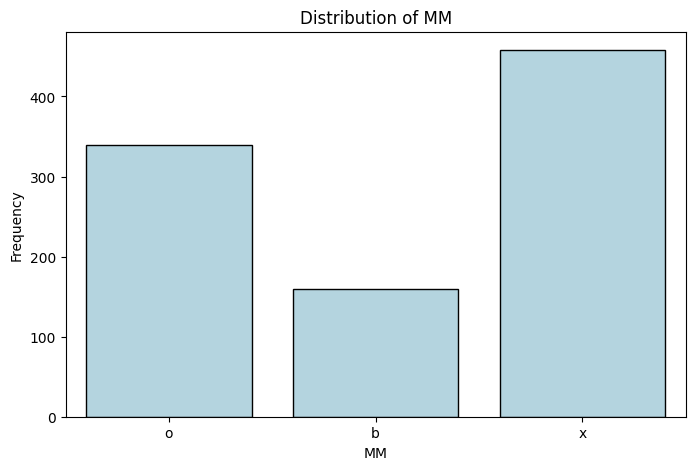

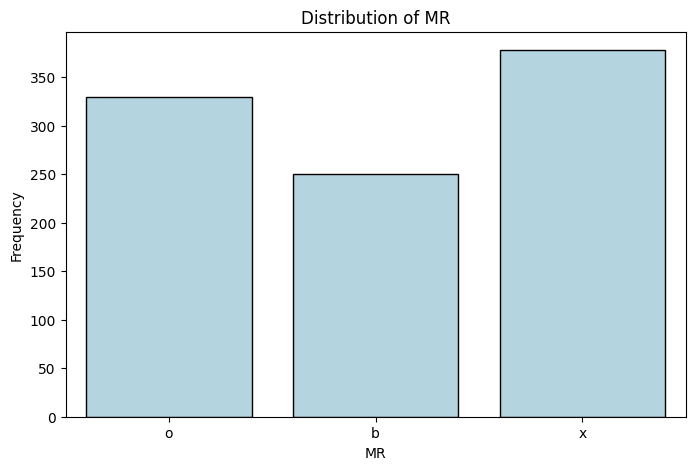

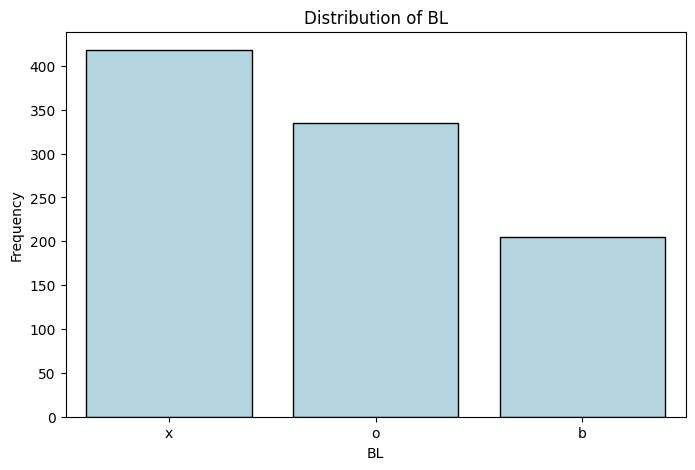

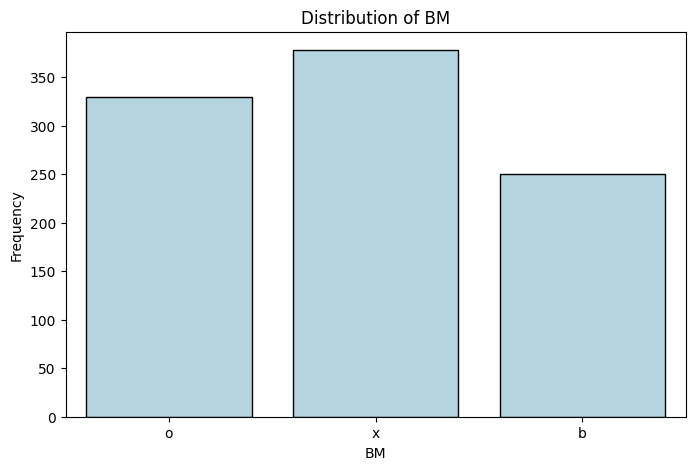

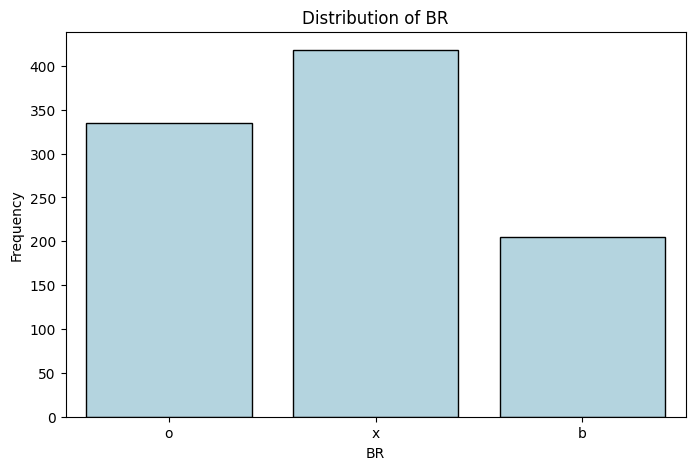

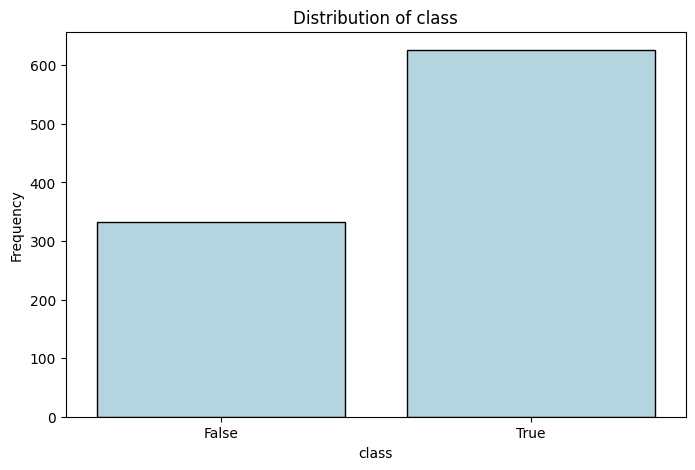

In [82]:
#Plot frequencies
for col in tic_tac_toe_data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=tic_tac_toe_data[col], color='lightblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [80]:
#Chi square to check for distribution
frequency_vals = tic_tac_toe_data['class'].value_counts()
observed = frequency_vals.values 
expected = [len(tic_tac_toe_data) / 2] * 2 

chi_square_stat, p_value = chisquare(observed, f_exp=expected)

print(f"Chi-Square Statistic: {chi_square_stat}, P-Value: {p_value}")

Chi-Square Statistic: 90.22546972860125, P-Value: 2.125087615705628e-21


In [91]:
#OneHot encode all categoricals to numerics
#Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

#Select categorical columns to encode
categorical_columns = ['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR']

#Fit and transform the encoder on these columns
encoded_features = encoder.fit_transform(tic_tac_toe_data[categorical_columns])

#Convert encoded features to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(
    encoded_features, 
    columns=encoder.get_feature_names_out(categorical_columns)
)

#Drop original categorical columns and add encoded ones
tic_tac_toe_encoded = pd.concat(
    [tic_tac_toe_data.drop(columns=categorical_columns), encoded_df],
    axis=1
)

#Convert 'class' column from boolean to integer (1 for True, 0 for False)
tic_tac_toe_encoded['class'] = tic_tac_toe_encoded['class'].astype(int)

#Display the first few rows of the updated dataset
print(tic_tac_toe_encoded.head())

   class  TL_b  TL_o  TL_x  TM_b  TM_o  TM_x  TR_b  TR_o  TR_x  ...  MR_x  \
0      1   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   0.0   
1      1   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   0.0   
2      1   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   0.0   
3      1   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   0.0   
4      1   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   0.0   

   BL_b  BL_o  BL_x  BM_b  BM_o  BM_x  BR_b  BR_o  BR_x  
0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   1.0   0.0  
1   0.0   1.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0  
2   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0  
3   0.0   1.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0  
4   1.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0  

[5 rows x 28 columns]


In [93]:
#Seperate inputs and outputs
X = tic_tac_toe_encoded.drop(columns=['class'])
y = tic_tac_toe_encoded['class']

In [101]:
#Normalize input data
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [166]:
# your code here
#Train, test, split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size=0.3)

#Initiate model
tic_tac_toe_model = Sequential()
tic_tac_toe_model.add(layers.Dense(128, activation='relu'))
tic_tac_toe_model.add(layers.Dense(128, activation='relu' ))
tic_tac_toe_model.add(layers.Dense(128, activation='relu'))
tic_tac_toe_model.add(layers.Dense(128, activation='relu'))
tic_tac_toe_model.add(layers.Dense(3, activation='softmax'))

#Compile model
tic_tac_toe_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#Fit model
tic_tac_toe_model.fit(X_train, y_train, epochs=7)

Epoch 1/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5963 - loss: 0.8309
Epoch 2/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7440 - loss: 0.5136 
Epoch 3/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8369 - loss: 0.3619 
Epoch 4/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9391 - loss: 0.2043 
Epoch 5/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9710 - loss: 0.0914 
Epoch 6/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9928 - loss: 0.0481 
Epoch 7/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0153 


In [168]:
#Test 
val_loss, val_accuracy = tic_tac_toe_model.evaluate(X_test, y_test)
print(f"Loss: {val_loss} \nAccuracy: {val_accuracy}" )

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9602 - loss: 0.0830  
Loss: 0.08400741219520569 
Accuracy: 0.9652777910232544


In [176]:
#Save model
tic_tac_toe_model.save('tic-tac-toe.keras')

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [186]:
# your code here
#Load new model
new_model = load_model("tic-tac-toe.keras")

In [214]:
#Select random indices
random_indices = np.random.choice(X_test.shape[0], size=5, replace=False)

#Select corresponding rows
random_rows = X_test[random_indices]
true_labels = y_test.iloc[random_indices]

#Predict using the loaded model
predictions = new_model.predict(random_rows)

#Interpret predictions
predicted_classes = np.argmax(predictions, axis=1)

#Print results
print("Random Rows (Features):\n", random_rows)
print("\nTrue Labels:\n", true_labels.values)
print("\nPredicted Classes:\n", predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Random Rows (Features):
 [[-0.52177041 -0.73329442  1.13660285 -0.59422836  1.37950364 -0.80729433
  -0.52177041 -0.73329442  1.13660285 -0.59422836  1.37950364 -0.80729433
  -0.44777366 -0.74172893  1.04484595 -0.59422836 -0.72489841  1.23870559
  -0.52177041 -0.73329442  1.13660285 -0.59422836  1.37950364 -0.80729433
  -0.52177041  1.36370873 -0.8798148 ]
 [-0.52177041  1.36370873 -0.8798148  -0.59422836  1.37950364 -0.80729433
  -0.52177041  1.36370873 -0.8798148  -0.59422836 -0.72489841  1.23870559
  -0.44777366 -0.74172893  1.04484595  1.68285472 -0.72489841 -0.80729433
  -0.52177041 -0.73329442  1.13660285 -0.59422836  1.37950364 -0.80729433
  -0.52177041 -0.73329442  1.13660285]
 [-0.52177041 -0.73329442  1.13660285 -0.59422836 -0.72489841  1.23870559
  -0.52177041 -0.73329442  1.13660285  1.68285472 -0.72489841 -0.80729433
  -0.44777366 -0.74172893  1.04484595 -0.59422836  1.37950364 -0.80729433
  -0.52177041  1.36370873 -0.8798148   1.6828

## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [ ]:
# your code here

**Which approach(es) did you find helpful to improve your model performance?**

In [ ]:
# your answer here